In [26]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_excel('niavaran.xlsx')

In [3]:
df.head()

,Unnamed: 0,زمان انتشار,تاريخ انتشار,سایت,شناسه آگهی,عنوان,آگهی دهنده,نوع کاربر,نوع ملک,پارکینگ,...,آسانسور,قیمت هر متر,قيمت کل,رنج قيمت,توضيحات,لينک تصاوير,مشاور آگهی,شماره تماس,محدوده,مختصات جغرافیایی
0,1,21:28:08,2022-02-24,دیوار,gYTQ804U,فروش آپارتمان104متری خوش نقشه داراباد,NaN,NaN,آپارتمان,1,...,1,48077000,5000000000,5 - 6,فروش آپارتمان104متری _ لوکیشن خوب داراباد\n _ ...,https://s100.divarcdn.com/static/pictures/1645...,NaN,NaN,نیاوران,NaN
1,2,21:18:08,2022-02-24,دیوار,QYIXX3l3,۱۰۸ متری نیاوران,مسکن مانا(شعبه اطلس مال),مشاور,آپارتمان,1,...,1,78704000,8500000000,8 - 9,⚜️ مشاورین املاک مانا⚜️\n \n➖➖➖➖➖➖➖➖➖➖➖➖➖➖➖...,https://s100.divarcdn.com/static/pictures/1645...,NaN,NaN,نیاوران,NaN
2,3,21:18:10,2022-02-24,دیوار,QYfHRBag,فروش آپارتمان130متری نوساز تراس چیدمان خداوردی,NaN,NaN,آپارتمان,1,...,1,107692000,14000000000,14 - 15,فروش آپارتمان130متری _ لوکیشن دنج خداوردی\nقوی...,https://s100.divarcdn.com/static/pictures/1645...,NaN,NaN,نیاوران,NaN
3,4,21:03:11,2022-02-24,دیوار,gYT88_iT,فروش آپارتمان202متری خوش نقشه فول 2p سپند منجیل,NaN,NaN,آپارتمان,1,...,1,73267000,14800000000,14 - 15,فروش آپارتمان202متری تکواحدی _ لوکیشن فیروزبخش...,https://s100.divarcdn.com/static/pictures/1645...,NaN,NaN,نیاوران,NaN
4,5,21:03:12,2022-02-24,دیوار,gYXsLfG-,نیاوران گلسنگ۱۹۵مترتکواحدی فول امکانات,كامرانيه,مشاور,آپارتمان,1,...,1,80000000,15600000000,15 - 16,تکواحدی\n\nتراس قابل چیدمان\n\nفرعی دنج ومشجر\...,https://s100.divarcdn.com/static/pictures/1645...,NaN,NaN,نیاوران,NaN


In [4]:
# اسم ستون‌های موجود در دیتاست
df.columns.values.tolist()

['Unnamed: 0',
 'زمان انتشار',
 'تاريخ انتشار',
 'سایت',
 'شناسه آگهی',
 'عنوان',
 'آگهی دهنده',
 'نوع کاربر',
 'نوع ملک',
 'پارکینگ',
 'تعداد اتاق',
 'متراژ',
 'انباری',
 'سال ساخت',
 'سن بنا',
 'آسانسور',
 'قیمت هر متر',
 'قيمت کل',
 'رنج قيمت',
 'توضيحات',
 'لينک تصاوير',
 'مشاور آگهی',
 'شماره تماس',
 'محدوده',
 'مختصات جغرافیایی']

In [5]:
# حذف ستون‌های اضافی
df.drop(['زمان انتشار', 'شناسه آگهی', 'عنوان', 'نوع کاربر', 'سال ساخت', 'قیمت هر متر', 'توضيحات', 'لينک تصاوير', 'مشاور آگهی', 'شماره تماس', 'محدوده', 'تاريخ انتشار', 'رنج قيمت', 'نوع ملک', 'آگهی دهنده', 'مختصات جغرافیایی', 'Unnamed: 0', 'سایت'], axis=1, inplace=True)
# حذف جدا کننده هزارگان در ستون قیمت کل، تبدیل آن به عدد صحیح و تقسیم بر یک میلیارد
df['قيمت کل'] = df['قيمت کل'].apply(lambda x: int(x.replace(',', ''))/1000000000)

In [6]:
# شکل جدید دیتافریم
df

,پارکینگ,تعداد اتاق,متراژ,انباری,سن بنا,آسانسور,قيمت کل
0,1,2,104,1,7,1,5.0
1,1,2,108,1,6,1,8.5
2,1,3,130,1,0,1,14.0
3,1,3,202,1,9,1,14.8
4,1,3,195,1,15,1,15.6
...,...,...,...,...,...,...,...
495,1,3,204,1,1,1,24.8
496,1,4,235,1,0,1,32.9
497,1,3,198,1,12,1,16.5
498,1,2,130,1,1,1,12.7


In [7]:
# اطلاعات آماری دیتاست
df.describe()

,پارکینگ,تعداد اتاق,متراژ,انباری,سن بنا,آسانسور,قيمت کل
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000
mean,0.992000,2.764000,173.158000,0.988000,6.214000,0.98000,17.650360
std,0.089173,0.687932,71.343653,0.108994,5.944989,0.14014,12.542619
min,0.000000,1.000000,40.000000,0.000000,0.000000,0.00000,1.200000
25%,1.000000,2.000000,121.500000,1.000000,1.000000,1.00000,8.718750
50%,1.000000,3.000000,164.000000,1.000000,4.000000,1.00000,14.000000
75%,1.000000,3.000000,210.000000,1.000000,11.000000,1.00000,21.062500
max,1.000000,5.000000,600.000000,1.000000,29.000000,1.00000,88.000000


In [8]:
# مشخصات ارزانترین آپارتمان موجود در دیتاست
df.iloc[df['قيمت کل'].idxmin()]

پارکینگ        0.0
تعداد اتاق     1.0
متراژ         75.0
انباری         0.0
سن بنا         2.0
آسانسور        1.0
قيمت کل        1.2
Name: 35, dtype: float64

In [9]:
# مشخصات گرانترین آپارتمان موجود در دیتاست
df.iloc[df['قيمت کل'].idxmax()]

پارکینگ         1.0
تعداد اتاق      4.0
متراژ         400.0
انباری          1.0
سن بنا          0.0
آسانسور         1.0
قيمت کل        88.0
Name: 444, dtype: float64

(0.0, 90.0)

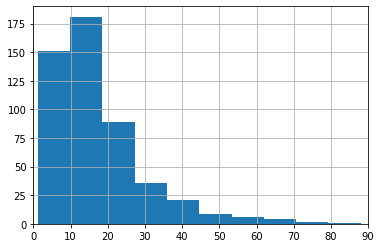

In [41]:
# (به میلیارد تومان) هیستوگرام ستون قیمت کل
df['قيمت کل'].apply(lambda x: x).hist().set_xlim((0,90))

In [10]:
# ذخیره جداگانه ویژگی‌ها و هدف در دو متغیر
X = df.drop(['قيمت کل'],axis=1)
y = df['قيمت کل']

In [12]:
# تقسیم داده به بخش‌های آموزش و تست
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [13]:
# (رگرسیون خطی) ایجاد یک شی از مدل یادگیری ماشین
reg = LinearRegression()

In [14]:
# آموزش مدل با داده مخصوص آموزش
reg.fit(X_train, y_train)

LinearRegression()

In [15]:
# ضرایب هر ویژگی در فرمول رگرسیون
reg.coef_

array([ 4.15253415,  0.93182161,  0.13062176, -5.82632066, -0.60085759,
       -5.7933645 ])

In [16]:
# پیشبینی قیمت کل در نمونه‌های تست با استفاده از مدل آموزش یافته
y_pred = reg.predict(X_test)

In [18]:
# (به میلیارد تومان) نتایج پیشبینی
y_pred


array([11.07934177, 10.23474759, 20.60608032, 22.25191201, 18.15039873,
       17.28828507, 14.23175843, 17.10543719,  4.02579175, 38.46647973,
        3.26819306,  5.93287951,  6.27248103, -0.9378101 ,  3.21592929,
       37.4307483 , 14.88485469, 10.58298661, 28.20828693, 14.88485469,
       12.38555939,  1.90971168, 17.57566047, 11.22745792,  2.92859154,
       11.7847018 , 18.02842702, 26.51021658,  7.83130466,  2.06647787,
       15.04159579, 11.23609542,  3.32044427, 18.01113947, 18.6467539 ,
        9.82537537, 20.37098123, 16.95732105, 23.81937315, 11.7847018 ,
       17.65404357,  4.9003859 , 14.34547842, 19.2998627 ,  9.74702993,
       17.37531822, 15.79920702,  8.07505381, 17.86304843, 14.86739796,
       35.02672532, 11.48871399, 11.3319729 , 22.33032021, 23.47113413,
       26.37955717, 16.60908203, 32.69300289,  3.1375964 , 15.92981623,
       12.77743723, 17.88914266,  6.32473224, 76.18139946, 10.46987178,
       20.8673364 , 17.70629478,  6.96920355, 20.8673364 , 15.68

In [19]:
# تخمین قیمت نمونه‌های تست
pd.concat([X_test.reset_index(drop=True),pd.DataFrame({'تخمین قیمت':y_pred})],axis=1)

,پارکینگ,تعداد اتاق,متراژ,انباری,سن بنا,آسانسور,تخمین قیمت
0,1,2,100,1,0,1,11.079342
1,1,3,160,1,16,1,10.234748
2,1,3,175,1,2,1,20.606080
3,1,3,183,1,1,1,22.251912
4,1,3,170,1,5,1,18.150399
...,...,...,...,...,...,...,...
95,1,3,180,1,17,1,12.246325
96,1,2,80,1,5,1,5.462619
97,1,2,100,1,20,1,-0.937810
98,1,3,250,1,3,1,29.801855


In [20]:
# loss محاسبه تابع
# میانگین مجذور تفاضل‌های مقادیر تخمین زده شده و مقادیر واقعی
mean_squared_error(y_test, y_pred)

18.698639486324566

In [21]:
# محاسبه دقت مدل
print(reg.score(X_test,y_test)*100,'%')

80.69324639131894 %


In [22]:
# چند بار اجرای الگوریتم و ذخیره دقت‌های به دست آمده در یک آرایه
scores = cross_val_score(reg, X, y, cv=20)

In [23]:
# دقت‌های به دست آمده از اجرای چندباره‌ی الگوریتم
scores

array([ 0.4982172 , -0.09037731,  0.92411539,  0.37375884,  0.61406427,
        0.76215273,  0.80483362,  0.84872471,  0.76123687,  0.5032744 ,
        0.80215342,  0.80751714,  0.71259506,  0.20177358,  0.85557756,
        0.7586806 ,  0.36651899,  0.76900726,  0.85500594,  0.84332653])

In [24]:
# میانگین دقت‌های به دست آمده از اجرای چندباره‌ی الگوریتم
scores.mean()

0.6486078403285329

In [25]:
# (به میلیارد تومان) پیشبینی قیمت آپارتمان با مشخصات زیر 
reg.predict(
    pd.DataFrame.from_dict
    ({
        
        
            'پارکینگ':[1],
            'تعداد اتاق':[3],
            'متراژ':[170],
            'انباری':[0],
            'سن بنا':[20],
            'آسانسور':[1]
        
        
        },orient='columns'))

array([14.9638555])